# 0.0. IMPORTS


In [1]:
import pandas as pd
import inflection
import math
import numpy as np
import seaborn as sns

#import matplotlib from  subplot

import matplotlib.pyplot as plt
from matplotlib            import pyplot as plt

from IPython.display import Image

import datetime
import time
from datetime import timedelta


## 0.1 Helper Funcions

## 0.2 Loaging data

In [2]:
#carregamento dos csv 

df_sales_raw = pd.read_csv('data/train.csv', low_memory=False )
df_store_raw = pd.read_csv('data/store.csv', low_memory=False )

#merge
#união dos df store e df sales
df_raw = pd.merge(df_sales_raw, df_store_raw, how ='left', on='Store')



# 1.0. PASSO 01 - DESCRICAO DOS DADOS

In [3]:
#copia do df
df1 = df_raw.copy()


## 1.1.  Rename Columns

In [4]:
#remoneação das colunas 

cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
             'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
              'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x)

cols_new  = list (map(snakecase, cols_old))

#remane 
df1.columns = cols_new


## 1.2. Data Dimensions 

In [5]:
print( 'Number of Rows: {}'.format( df1.shape[0]))
print( 'Number of cols: {}'.format( df1.shape[1]))

Number of Rows: 1017209
Number of cols: 18


## 1.3. Data Types

In [6]:
#tipos de dados de cada coluna
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes


store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Check NA

In [7]:
df1.isna().sum()
#linhas com NA

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5. Fillout NA

In [8]:
df1['competition_distance'].max()

75860.0

In [9]:
#competition_distance           
df1['competition_distance'] = df1['competition_distance'].apply (lambda x: 200000.0 if math.isnan(x) else x)
##substituir os NA da competition distance acima do valor maximo, usar o lambda para criar a função, usra o apply para aplicar nas colunas, substituir essa coluna 
#na coluna original.


#competition_open_since_month 
df1['competition_open_since_month'] = df1.apply( lambda x: x['date'].month if math.isnan( x['competition_open_since_month']) else x['competition_open_since_month'],axis=1 )
# se a coluna for NA irá extrair o mês dela, se não for era permanecer. por fim sobre escreve a coluna original


#competition_open_since_year
df1['competition_open_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1 )



#promo2_since_week    
df1['promo2_since_week'] = df1.apply( lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1 )


#promo2_since_year
df1['promo2_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1 )


#promo_interval  
month_map = {1: 'jan', 2: 'fev', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec', }

df1['promo_interval'].fillna(0, inplace=True)
#coluna com NA igual a zero (inplace true não retorna valor modifica na propria coluna)

df1['month_map'] = df1['date'].dt.month.map(month_map)


df1['is_promo'] = df1[['promo_interval', 'month_map']].apply (lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)
#quebrar as linhas com split, ver se o elemento da coluna esta na lista, se sim retorna 1 se não retorna 0, se promo_interval for igual a 0 retorno 0 se nãp volto igual a 1
#promo_interval e month_map como filtros





In [10]:
df1.sample(5).T

,232306,717171,977410,281049,521538
store,387,1012,341,868,504
day_of_week,7,5,2,5,5
date,2015-01-04 00:00:00,2013-09-27 00:00:00,2013-02-05 00:00:00,2014-11-14 00:00:00,2014-03-21 00:00:00
sales,0,6404,7038,10743,5990
customers,0,533,886,672,876
open,0,1,1,1,1
promo,0,1,1,1,1
state_holiday,0,0,0,0,0
school_holiday,0,0,0,0,0
store_type,c,d,a,d,c


In [11]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6. CHange Types

In [12]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)


df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)


## 1.7. Descriptive Statistical

In [13]:
num_attributes = df1.select_dtypes(include = ['int64','float64'])
 
cat_attributes = df1.select_dtypes(exclude = ['int64','float64', 'datetime64[ns]']) 

## 1.7.1 Numeriacal Attributes

In [14]:
# skew deformação da distribuicao em relação a normal, mais para esquerda skew positiva, mais para esquerda skew negativa

#kurtosis concentração dos dados, quando positiva mais dados concentrados, pico alto, mais disperso negativo 


In [15]:
# central tendency - maen , median 
ct1 = pd.DataFrame( num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame( num_attributes.apply(np.median)).T



# Dispersion - atd, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply( np.std )).T
d2 = pd.DataFrame(num_attributes.apply( min )).T
d3 = pd.DataFrame(num_attributes.apply( max )).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew() )).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis() )).T

#concatenate (concatenar = unir)
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median','std', 'skew', 'kurtosis']

m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


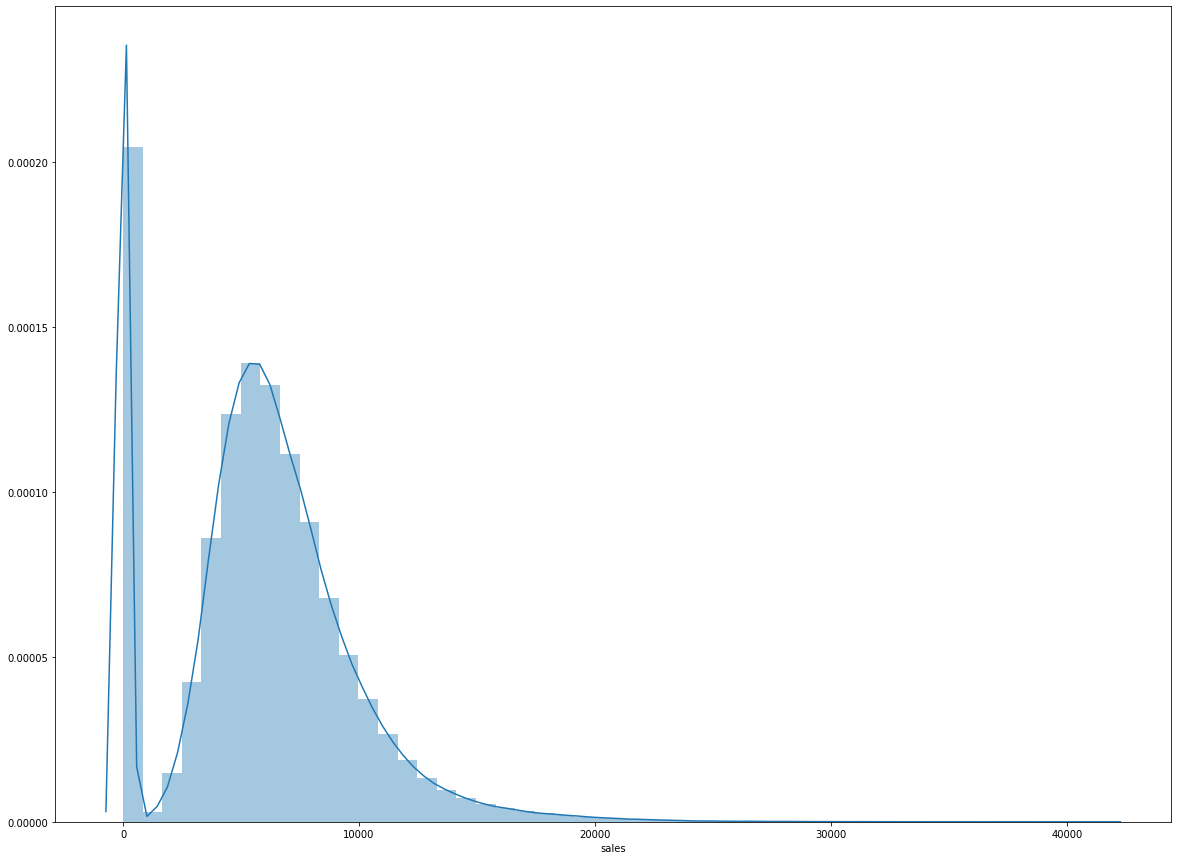

In [16]:
fig, ax = plt.subplots(figsize=(20,15))
sns.distplot(df1['sales'])

## 1.7.2 Categorical Attributes

In [17]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

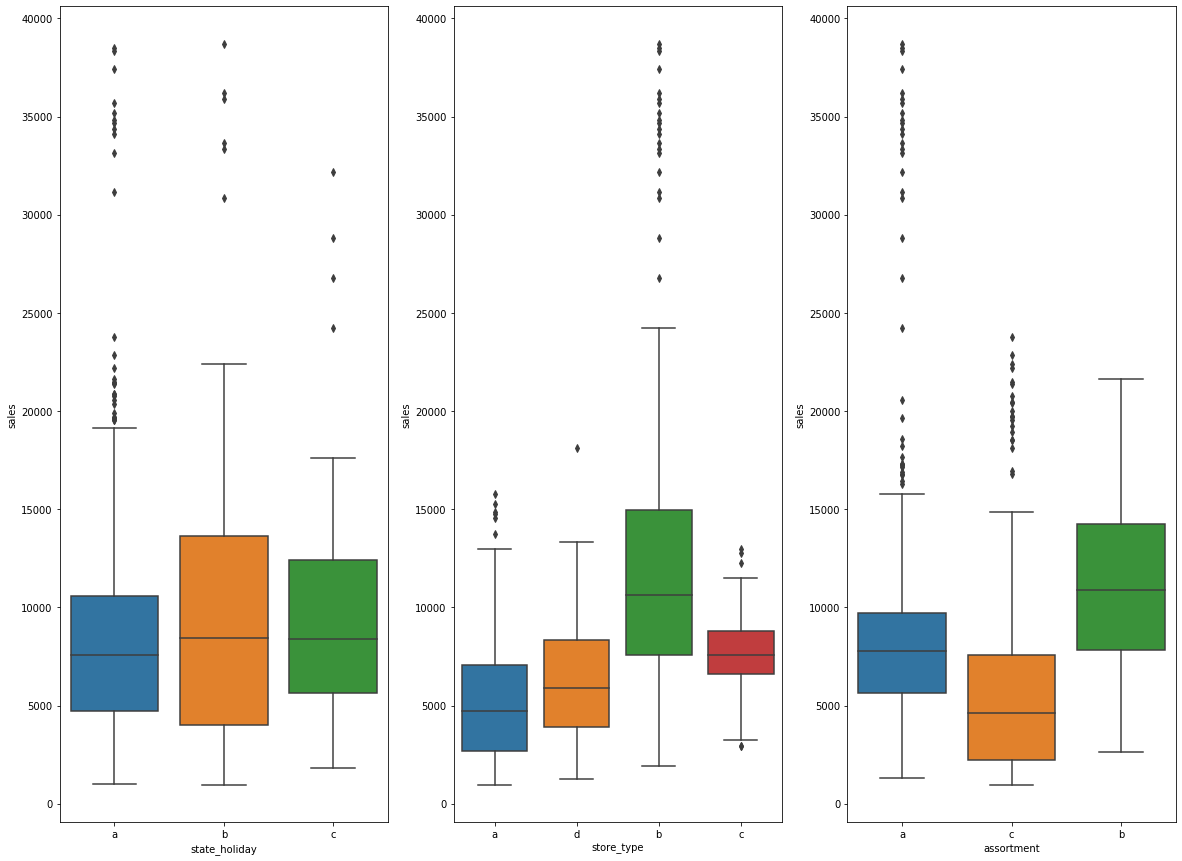

In [18]:
#auxiliar satate_holiday diferente de 0 e vendes acima de 0
fig, ax = plt.subplots(figsize=(20,15))

aux1 = df1[(df1['state_holiday'] !='0')  & (df1['sales']>0)]

plt.subplot(1, 3, 1)
sns.boxplot(x='state_holiday', y='sales',data=aux1)
figsize=(10)

plt.subplot(1, 3, 2)
sns.boxplot(x='store_type', y='sales',data=aux1)
figsize=(10)

plt.subplot(1, 3, 3)
sns.boxplot(x='assortment', y='sales',data=aux1)
figsize=(10)


# 2. PASSO 02 - FEATURE ENGINEERING 

In [19]:
df2 = df1.copy()

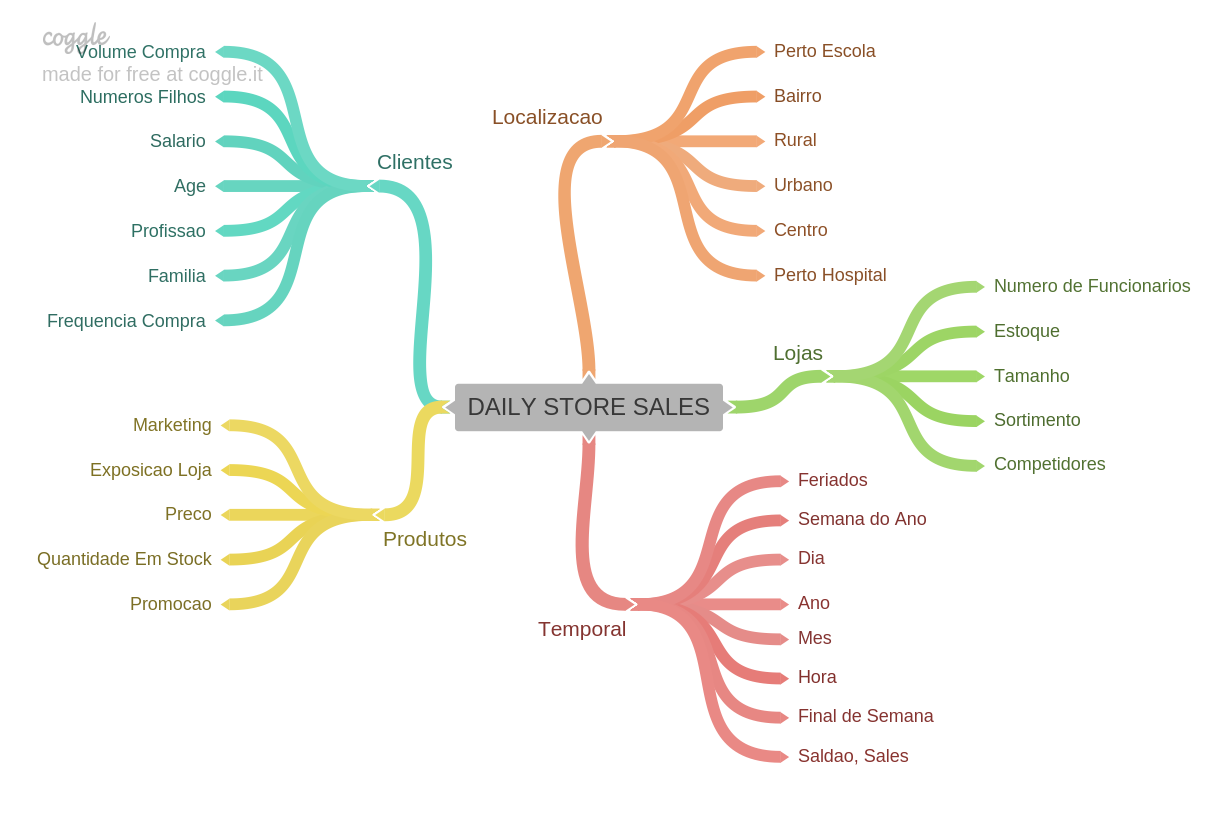

In [20]:
Image('img/MindMapHypothesis.png')

## 2.2. Criacao das Hipoteses

### 2.2.1. Hipoteses Loja

1. Lojas com número maior de funcionários deveriam vender mais.

2. Lojas com maior capacidade de estoque deveriam vender mais.

3. Lojas com maior porte deveriam vender mais.

4. Lojas com maior sortimentos deveriam vender mais.

5. Lojas com competidores mais próximos deveriam vender menos.

6. Lojas com competidores à mais tempo deveriam vendem mais.

### 2.2.1. Hipoteses Produto 

1. Lojas que investem mais em Marketing deveriam vender mais.

2. Lojas com maior exposição de produto deveriam vender mais.

3. Lojas com produtos com preço menor deveriam vender mais.

5. Lojas com promoções mais agressivas ( descontos maiores ), deveriam vender mais.

6. Lojas com promoções ativas por mais tempo deveriam vender mais.

7. Lojas com mais dias de promoção deveriam vender mais.

8. Lojas com mais promoções consecutivas deveriam vender mais

### 2.2.1. Hipoteses tempo

1. Lojas abertas durante o feriado de Natal deveriam vender mais.

2. Lojas deveriam vender mais ao longo dos anos.

3. Lojas deveriam vender mais no segundo semestre do ano.

4. Lojas deveriam vender mais depois do dia 10 de cada mês.

5. Lojas deveriam vender menos aos finais de semana.

6. Lojas deveriam vender menos durante os feriados escolares.

## 2.3. Lista final de Hipóteses

### 2.4. Feature Engeneering

In [21]:
# **year**
df2['year'] = df2['date'].dt.year #(metodo dt datetime que extrai o year)
#month
df2['month'] = df2['date'].dt.month

#day
df2['day'] = df2['date'].dt.day

#week of year 
df2['week_of_year'] = df2['date'].dt.weekofyear

#year week
df2['year_week'] = df2['date'].dt.strftime( '%y-%w') #(metodo ftime mudar o formato da data)

#competition since
df2['competition_since'] = df2.apply( lambda x: datetime.datetime( year=x['competition_open_since_year'], month=x['competition_open_since_month'],day=1 ), axis=1 )
#( juntar as duas colunas usa-se o metodo datetime determeina o year(competition_year), o month(competition_month) e day )
df2['competition_time_month']=((df2['date']- df2['competition_since'])/30).apply(lambda x: x.days).astype(int)
#(subtrair date do con_since, dividir por 30, aplicar a funçãp day e converter para int)

#promo since
df2['promo_since'] = df2['competition_since']= df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
#(subtrair a coluna year com a coluna week e converter para str)
df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x +'-1', '%Y-%W-%w') - datetime.timedelta(days =7))
#(aplicar a função timedelta e subtrair 7 dias)
df2['promo_time_week'] = ((df2['date'] - df2['promo_since'])/7 ).apply( lambda x: x.days).astype(int)

#assortment
df2['assortment'] = df2['assortment'].apply (lambda x:'basic' if x== 'a' else 'extra' if x=='b' else 'extended')
#(se x for igual a retorno basic, se x for igual a b retorno extra, senao retorno extended)

#state holiday
df2['state_holiday'] = df2['state_holiday'].apply (lambda x: 'public_holiday' if x=='a' else 'easte_holiday' if x=='b'else 'christmas' if x=='c' else 'regular_day')

In [22]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


# 3.0.PASSO 03 - FILTRAGEM DE VARIÁVEIS

In [23]:
df3=df2.copy()

In [24]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,0,2015,7,31,31,15-5,2015-31,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,0,2015,7,31,31,15-5,2010-13,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,0,2015,7,31,31,15-5,2011-14,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,0,2015,7,31,31,15-5,2015-31,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,0,2015,7,31,31,15-5,2015-31,4,2015-07-27,0


 ## 3.1. FIltragem das Linhas 

In [25]:
df3 = df3[(df3['open'] !=0) & (df3['sales'] >0)]

## 3.2. Selecao das colunas

In [26]:
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']
df3= df3.drop(cols_drop, axis=1)

In [27]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

In [28]:
df3.head


<bound method NDFrame.head of          store  day_of_week       date  sales  promo   state_holiday  \
0            1            5 2015-07-31   5263      1     regular_day   
1            2            5 2015-07-31   6064      1     regular_day   
2            3            5 2015-07-31   8314      1     regular_day   
3            4            5 2015-07-31  13995      1     regular_day   
4            5            5 2015-07-31   4822      1     regular_day   
...        ...          ...        ...    ...    ...             ...   
1016776    682            2 2013-01-01   3375      0  public_holiday   
1016827    733            2 2013-01-01  10765      0  public_holiday   
1016863    769            2 2013-01-01   5035      0  public_holiday   
1017042    948            2 2013-01-01   4491      0  public_holiday   
1017190   1097            2 2013-01-01   5961      0  public_holiday   

         school_holiday store_type assortment  competition_distance  ...  \
0                     1      

# 4.0. PASSO 04 - FILTRAGEM DE VARIÁVEIS

In [29]:
df4 = df3.copy()

## 4.1 Analise Univariada

### 4.1.1 Response Variable

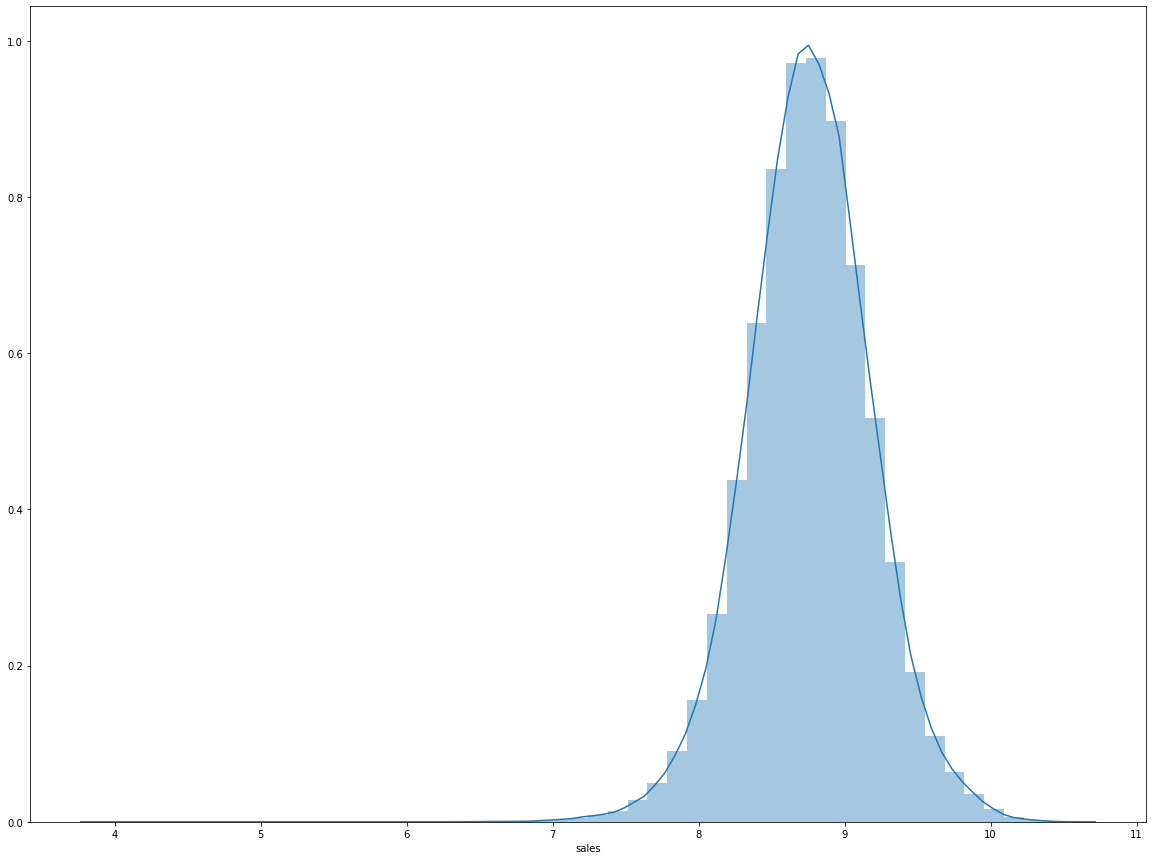

In [30]:
#log1p deica a variavel comdistribuiçao mais perto do nomal 
fig,ax=plt.subplots(figsize=(20,15))
sns.distplot(np.log1p(df4['sales']))


### 4.1.2 Numeral Variable

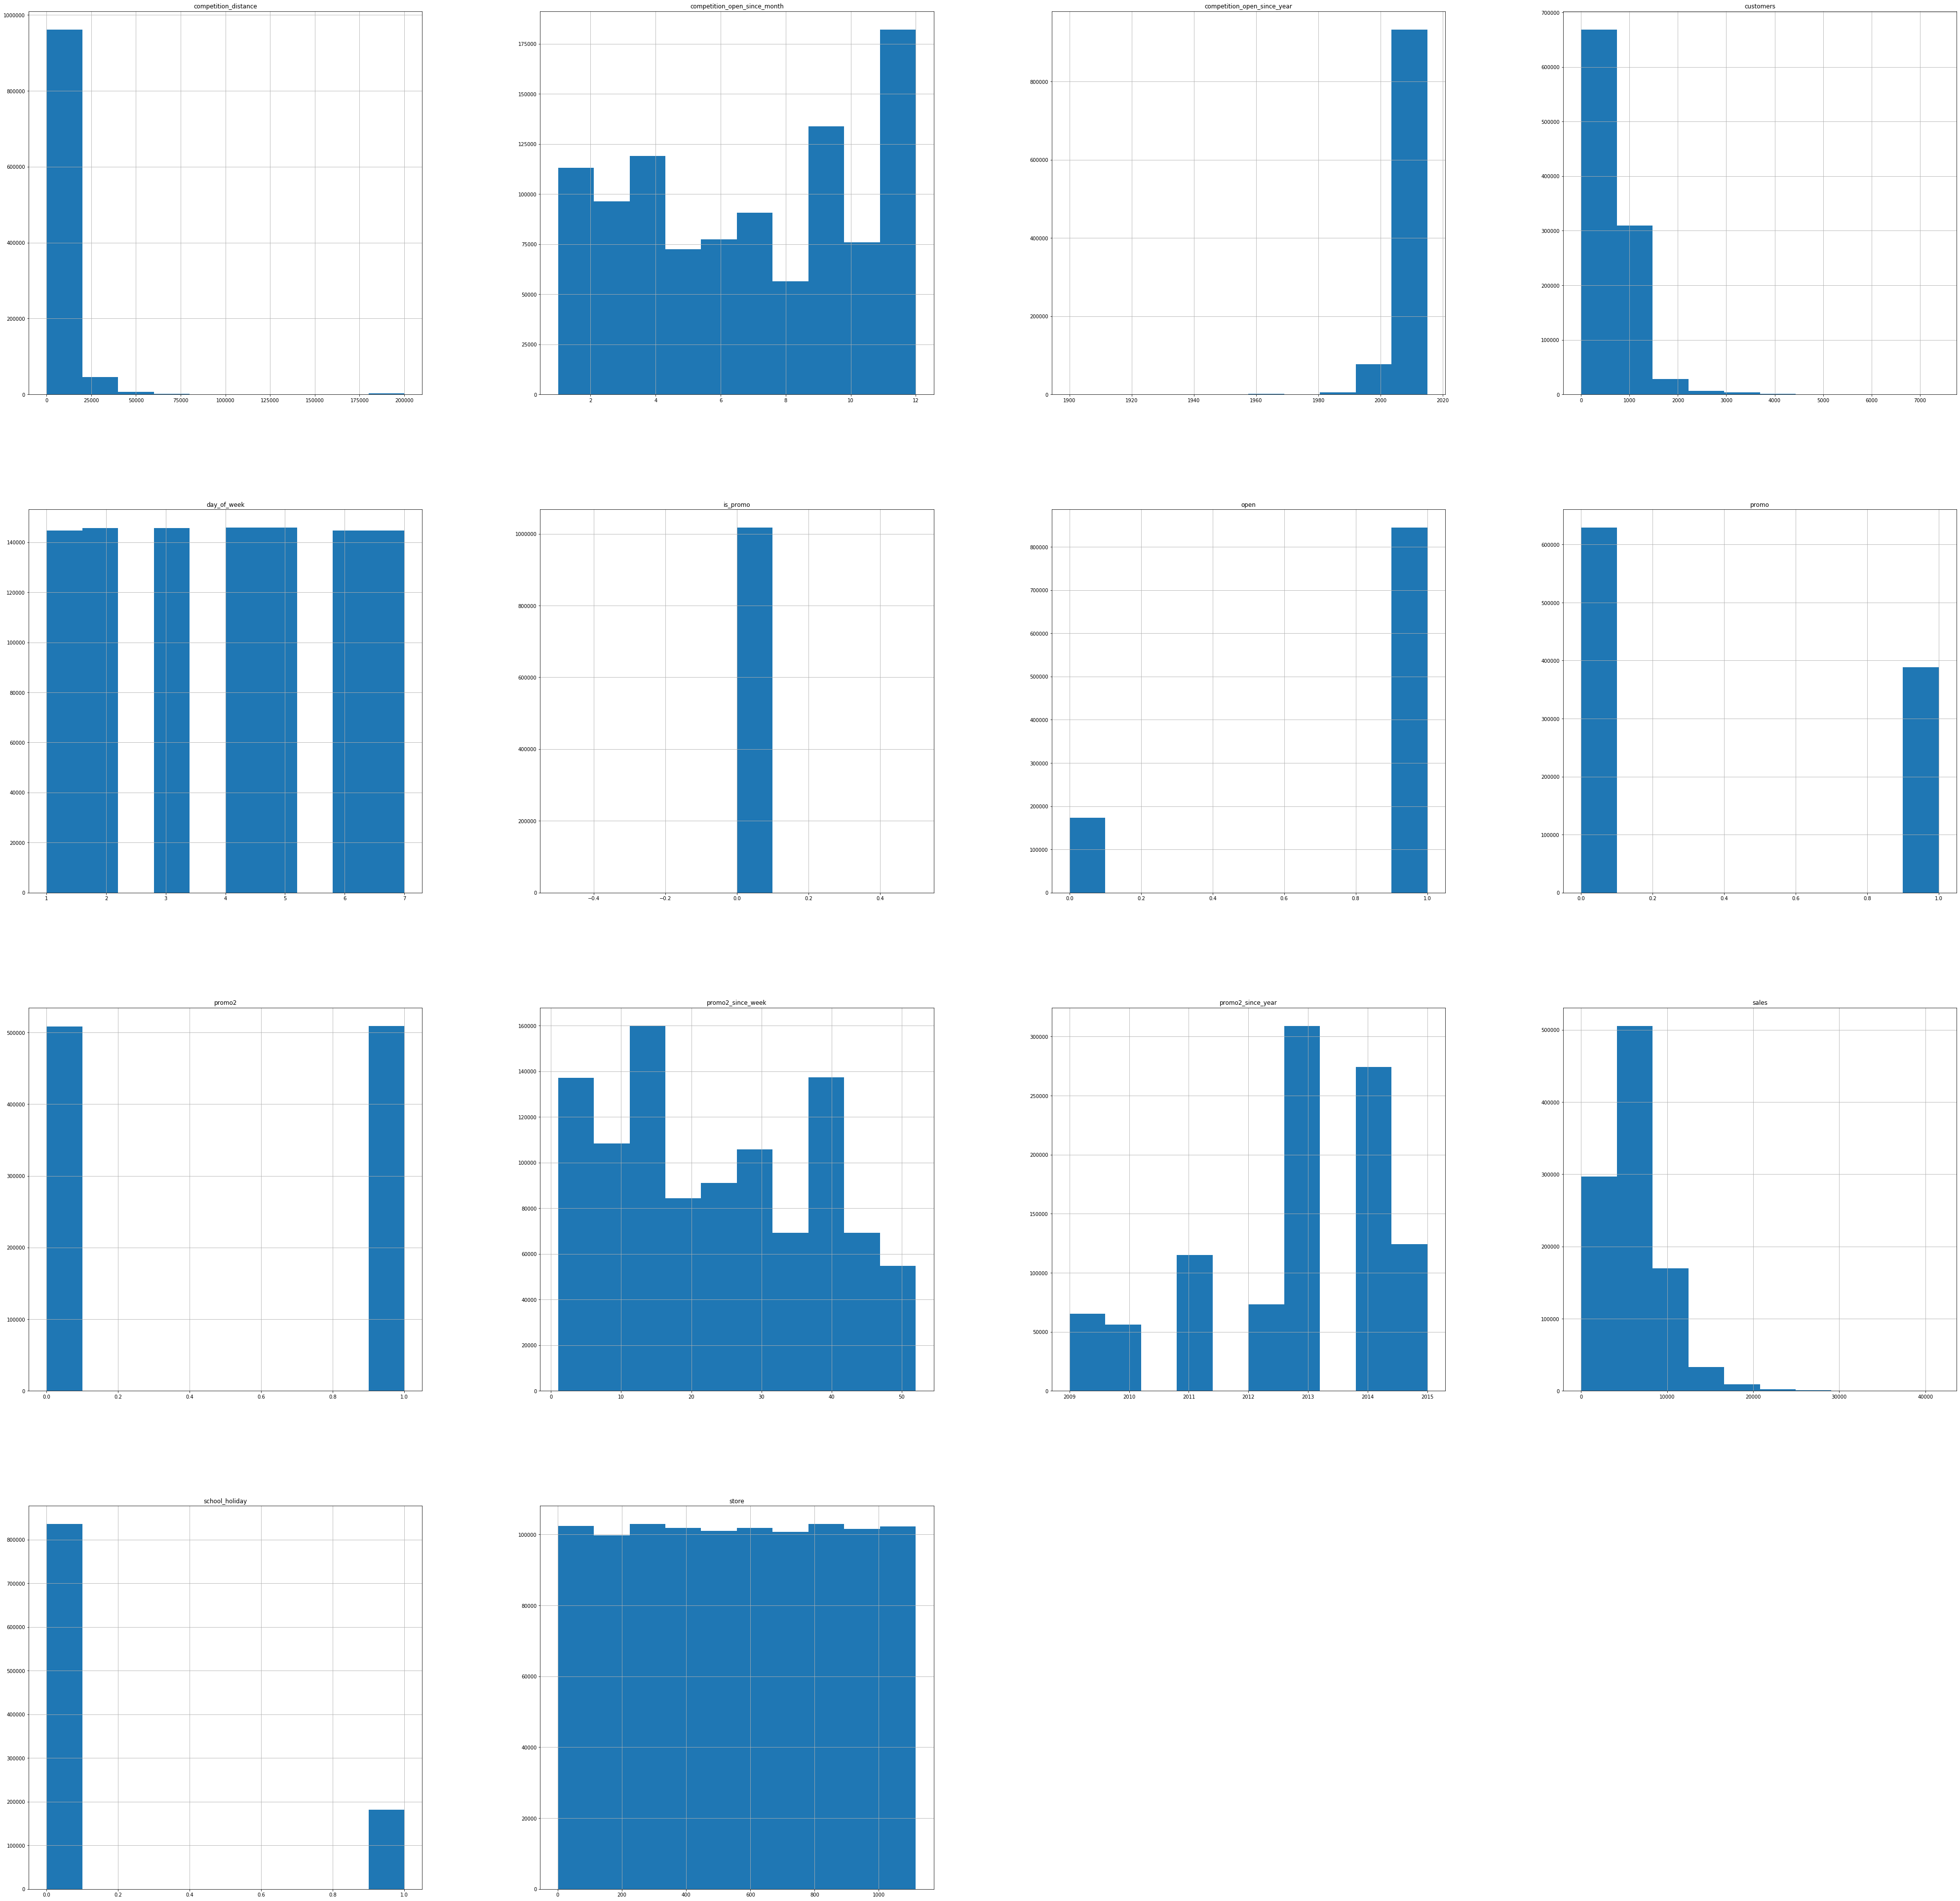

In [31]:
#cria um histograma de todas as variaveis numericas 
num_attributes.hist(bins =10 );

from matplotlib import pyplot as plt
fig1 = plt.figure(1)
plt.plot([[50,55], [60, 65]])

fig1.set_size_inches(70, 70)


plt.show()

### 4.1.3 Categorical Variable

In [32]:
df4['assortment'].drop_duplicates()

0         basic
3      extended
258       extra
Name: assortment, dtype: object

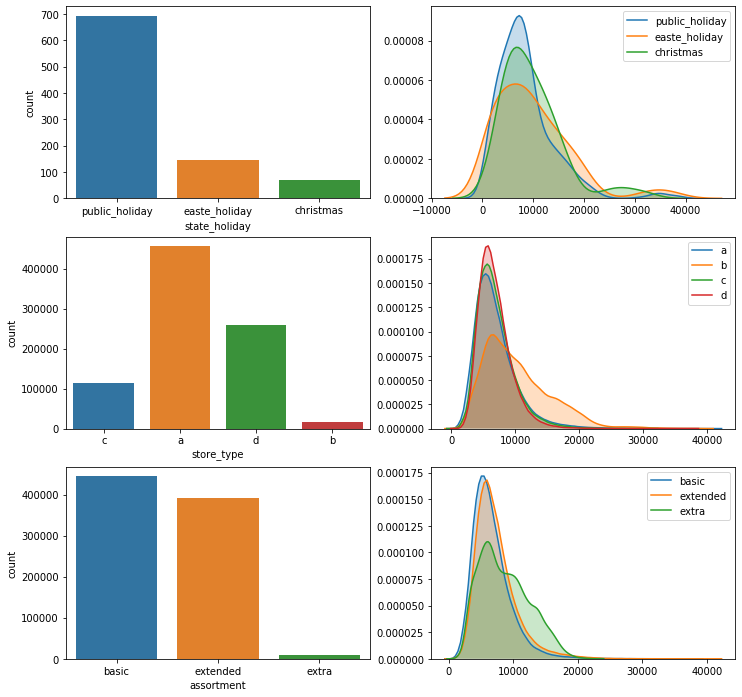

In [33]:
fig,ax=plt.subplots(figsize=(12,12))
#state_holiday
plt.subplot(3,2,1)
a = df4[df4['state_holiday'] != 'regular_day']
sns.countplot(a['state_holiday'])

plt.subplot(3,2,2)
sns.kdeplot(df4[df4['state_holiday']=='public_holiday']['sales'], label='public_holiday', shade=True)
sns.kdeplot(df4[df4['state_holiday']=='easte_holiday']['sales'], label='easte_holiday', shade=True)
sns.kdeplot(df4[df4['state_holiday']=='christmas']['sales'], label='christmas', shade=True)

#store_type
plt.subplot(3,2,3)
sns.countplot(df4['store_type'])

plt.subplot(3,2,4)
sns.kdeplot(df4[df4['store_type']=='a']['sales'], label='a', shade=True)
sns.kdeplot(df4[df4['store_type']=='b']['sales'], label='b', shade=True)
sns.kdeplot(df4[df4['store_type']=='c']['sales'], label='c', shade=True)
sns.kdeplot(df4[df4['store_type']=='d']['sales'], label='d', shade=True)


#assortment

plt.subplot(3,2,5)
sns.countplot(df4['assortment'])

plt.subplot(3,2,6)
sns.kdeplot(df4[df4['assortment']=='basic']['sales'], label='basic', shade=True)
sns.kdeplot(df4[df4['assortment']=='extended']['sales'], label='extended', shade=True)
sns.kdeplot(df4[df4['assortment']=='extra']['sales'], label='extra', shade=True)


## 4.2 Analise Bivariada

### *H1. Lojas com maior sortimentos deveriam vender mais.*
**FALSA** lojas com MAIOR SORTIMENTO vendem MENOS.




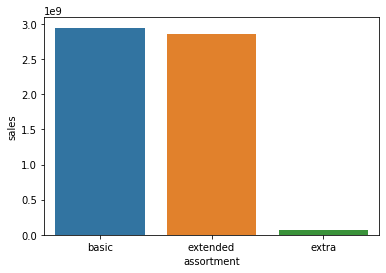

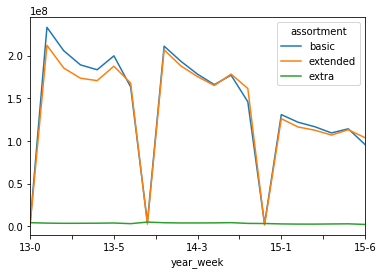

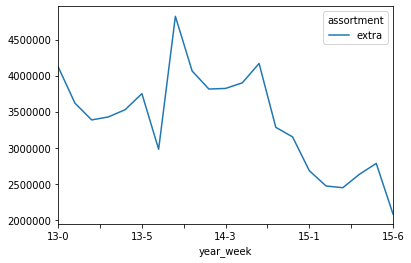

In [41]:


#agrupou os sortimentos por vendas, e somou o resultado e resetou o index
aux1 = df4[['assortment', 'sales']].groupby('assortment').sum().reset_index()
sns.barplot(x='assortment', y='sales',data=aux1);

#usou o pivot para visualizar melhor o index, a coluna e o valor.
aux2= df4[['year_week', 'assortment','sales']].groupby(['year_week','assortment']).sum().reset_index()
aux2.pivot(index='year_week', columns ='assortment', values='sales').plot()

#plotagem do extra solo para observar seu comportamento
aux3 = aux2[aux2['assortment']== 'extra']
aux3.pivot(index ='year_week', columns= 'assortment', values='sales').plot()



### *H2. Lojas com competidores mais próximos deveriam vender menos.*
**FALSA** lojas com COMPETIDORES MAIS PROXIMOS vendes MAIS



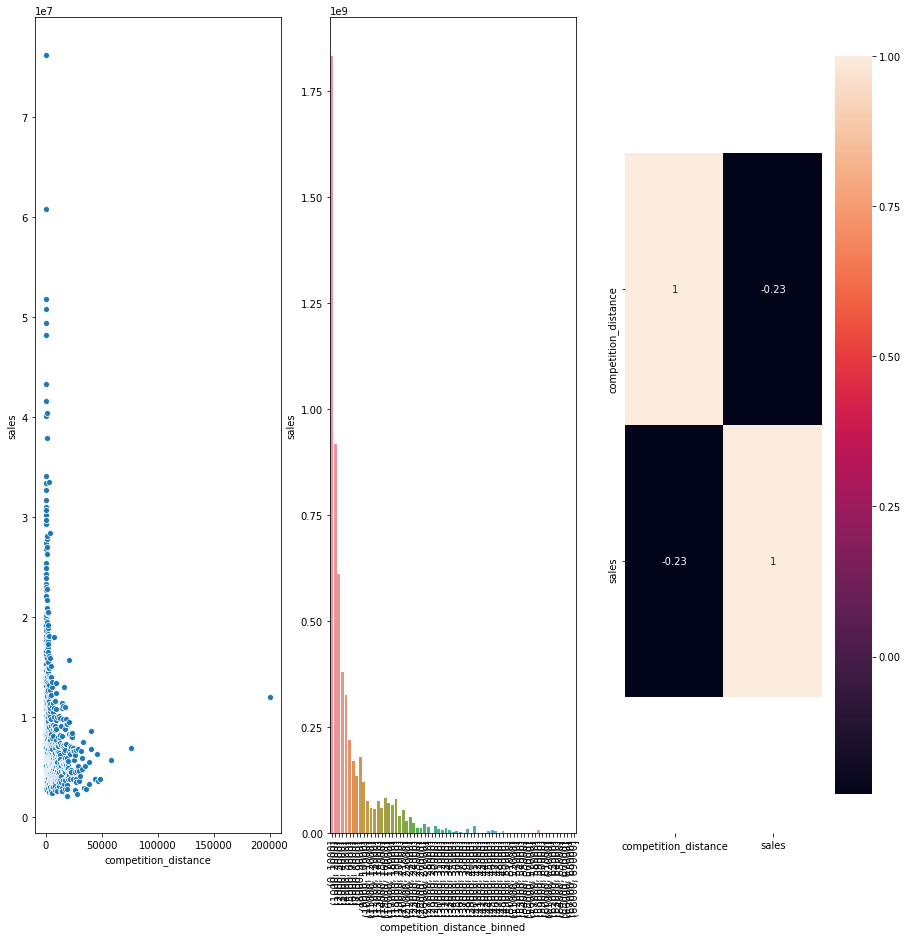

In [83]:
#para facilitar a visualização, cria-se bins com intervalo de distancia entre os pontos 
aux1 = df4[['competition_distance','sales']].groupby('competition_distance').sum().reset_index()

plt.subplot(1,3,1)
plt.rcParams["figure.figsize"] = (15, 15)
sns.scatterplot(x = 'competition_distance', y='sales', data=aux1);


plt.subplot(1,3,2)
plt.rcParams["figure.figsize"] = (15, 15)
bins = list(np.arange(0,70000, 1000))
aux1['competition_distance_binned'] = pd.cut(aux1['competition_distance'], bins=bins)
aux2 = aux1[['competition_distance_binned','sales']].groupby('competition_distance_binned').sum().reset_index()
sns.barplot(x='competition_distance_binned' , y='sales', data=aux2);
plt.xticks(rotation=90);

plt.subplot(1,3,3)
plt.rcParams["figure.figsize"] = (15, 15)
x = sns.heatmap(aux1.corr(method='pearson'), annot=True);

bottom, top = x.get_ylim()
x.set_ylim(bottom+0.5, top-0.5 );



### *H3. Lojas com competidores à mais tempo deveriam vendem mais.*
**FALSE** LOjas com COMPETIDORE À MAIS TEMPO vendem MENOS.

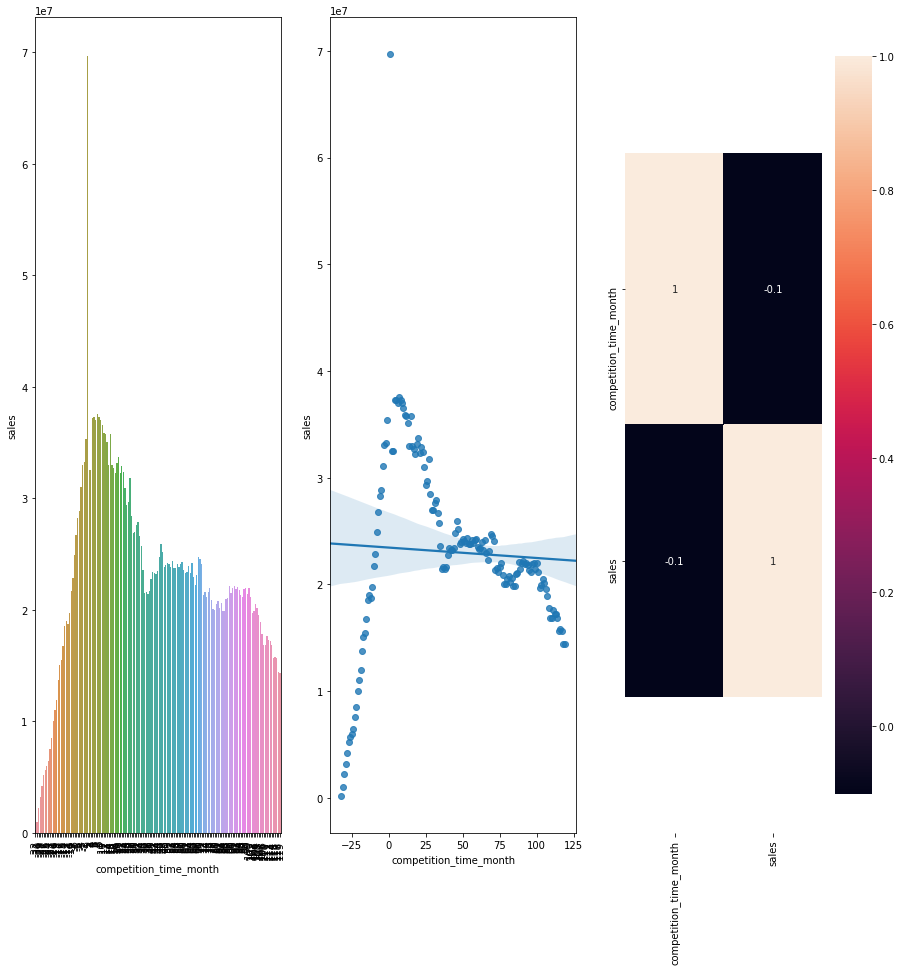

In [89]:
#por conta da grande granularidade dos dados, é necessário filtrar por os 12 primeiros meses 
#e por lojas que venderam no mesmo mês de abertura

plt.subplot(1,3,1)
aux1 = df4[['competition_time_month', 'sales']].groupby('competition_time_month').sum().reset_index()
aux2 = aux1[(aux1['competition_time_month']< 120 ) & (aux1['competition_time_month']!=0)]
sns.barplot(x='competition_time_month', y='sales', data=aux2);
plt.xticks(rotation=90);


plt.subplot(1,3,2)

sns.regplot(x='competition_time_month', y='sales', data=aux2);

plt.subplot(1,3,3)
plt.rcParams["figure.figsize"] = (15, 15)
x = sns.heatmap(aux1.corr(method='pearson'), annot=True);
botoom,top =x.get_ylim()

x.set_ylim(bottom +0.5, top-0.5);
plt.xticks(rotation=90);

In [80]:
df4.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

## 4.3 Analise Multivariada